✅ Synthetic dataset saved at: D:\game\climate_forecast_project\data\co2_monthly.csv


,date,value,planting_rate,cars_per_k
0,2000-01-01,371.16,183,402
1,2000-02-01,371.95,199,402
2,2000-03-01,372.90,217,408
3,2000-04-01,372.38,198,393
4,2000-05-01,372.03,202,407
5,2000-06-01,370.97,214,394
6,2000-07-01,369.85,209,406
7,2000-08-01,369.75,193,402
8,2000-09-01,369.79,203,401
9,2000-10-01,369.65,201,391


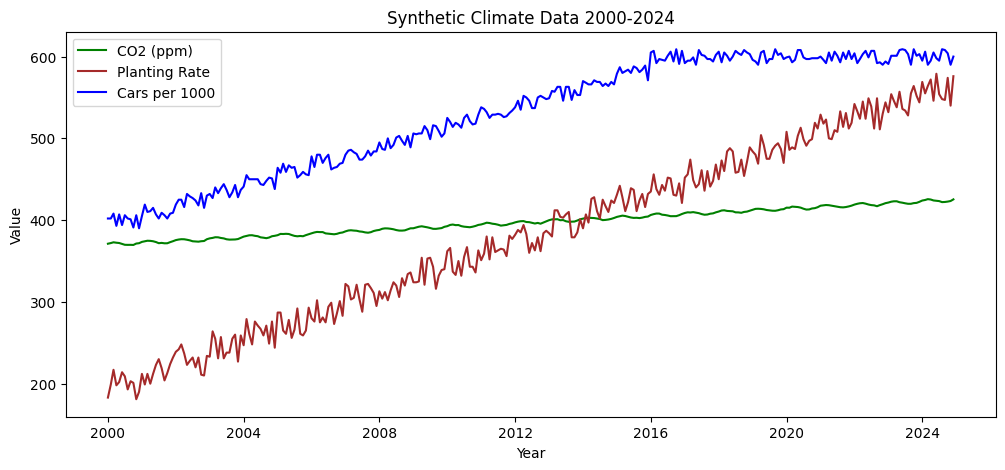

In [ ]:


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


out_path = r"D:\game\climate_forecast_project\data\co2_monthly.csv"
os.makedirs(os.path.dirname(out_path), exist_ok=True)


dates = pd.date_range(start="2000-01-01", end="2024-12-01", freq="MS")


base = 370
years = (dates.year - 2000) + (dates.month - 1)/12
trend = base + 2.2 * years
season = 2 * np.sin(2 * np.pi * dates.month / 12)
noise = np.random.normal(0, 0.3, len(dates))
co2 = trend + season + noise


planting_rate = 200 + (dates.year - 2000) * 15 + np.random.randint(-20, 20, len(dates))
cars_per_k = np.where(dates.year <= 2015,
                      400 + (dates.year - 2000) * 12 + np.random.randint(-10, 10, len(dates)),
                      600 + np.random.randint(-10, 10, len(dates)))


df = pd.DataFrame({
    "date": dates,
    "value": np.round(co2, 2),
    "planting_rate": planting_rate,
    "cars_per_k": cars_per_k
})


df.to_csv(out_path, index=False)
print(f" Synthetic dataset saved at: {out_path}")


display(df.head(10))


plt.figure(figsize=(12,5))
plt.plot(df["date"], df["value"], label="CO2 (ppm)", color="green")
plt.plot(df["date"], df["planting_rate"], label="Planting Rate", color="brown")
plt.plot(df["date"], df["cars_per_k"], label="Cars per 1000", color="blue")
plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Synthetic Climate Data 2000-2024")
plt.legend()
plt.show()
